In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [137]:
covid_df = pd.read_csv('covid_data.csv')

In [138]:
covid_df.shape

(23082, 8)

In [139]:
covid_df.dtypes

location                       object
date                           object
new_cases                       int64
new_deaths                      int64
population                    float64
aged_65_older_percent         float64
gdp_per_capita                float64
hospital_beds_per_thousand    float64
dtype: object

In [140]:
covid_df.head()
# covid_df.tail()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [141]:
covid_df.describe()

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,23082.000000,23082.000000,2.301800e+04,20643.000000,20711.000000,19144.000000
mean,624.769257,35.629062,1.037003e+08,9.758570,22708.384791,3.204687
std,5517.309068,330.986941,6.716897e+08,6.445662,21187.826121,2.593700
min,-2461.000000,-1918.000000,8.090000e+02,1.144000,661.240000,0.100000
25%,0.000000,0.000000,2.083380e+06,3.853000,6426.674000,1.400000
50%,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000
75%,55.000000,1.000000,3.346920e+07,15.322000,35220.084000,4.210000
max,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000


In [142]:
covid_df.isnull().sum()

location                         0
date                             0
new_cases                        0
new_deaths                       0
population                      64
aged_65_older_percent         2439
gdp_per_capita                2371
hospital_beds_per_thousand    3938
dtype: int64

In [143]:
covid_df.duplicated().sum()

0

In [144]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [145]:
covid_df.drop_duplicates(inplace=True)
for col in covid_df.columns :
    print(col,': ', covid_df[col].nunique())
    print("--------------------------------------------------------")

location :  212
--------------------------------------------------------
date :  163
--------------------------------------------------------
new_cases :  2073
--------------------------------------------------------
new_deaths :  634
--------------------------------------------------------
population :  211
--------------------------------------------------------
aged_65_older_percent :  183
--------------------------------------------------------
gdp_per_capita :  184
--------------------------------------------------------
hospital_beds_per_thousand :  100
--------------------------------------------------------


In [146]:
null_cols = ["population", "aged_65_older_percent", "gdp_per_capita", "hospital_beds_per_thousand"]
for col in null_cols :
    covid_df[col].fillna(method='ffill', inplace=True)

In [147]:
covid_df.isna().sum()

location                      0
date                          0
new_cases                     0
new_deaths                    0
population                    0
aged_65_older_percent         0
gdp_per_capita                0
hospital_beds_per_thousand    0
dtype: int64

In [148]:
covid_df.set_index('date')

,location,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
date,,,,,,,
2019-12-31,Afghanistan,0,0,3.892834e+07,2.581,1803.987,0.500
2020-01-01,Afghanistan,0,0,3.892834e+07,2.581,1803.987,0.500
2020-01-02,Afghanistan,0,0,3.892834e+07,2.581,1803.987,0.500
2020-01-03,Afghanistan,0,0,3.892834e+07,2.581,1803.987,0.500
2020-01-04,Afghanistan,0,0,3.892834e+07,2.581,1803.987,0.500
...,...,...,...,...,...,...,...
2020-02-28,International,0,0,7.794799e+09,8.696,15469.207,2.705
2020-02-29,International,0,2,7.794799e+09,8.696,15469.207,2.705
2020-03-01,International,0,0,7.794799e+09,8.696,15469.207,2.705


In [149]:
germany = covid_df[covid_df.location == "Germany"]
italy = covid_df[covid_df.location == "Italy"]

In [150]:
germany["cumsum"] = germany.new_cases.cumsum()
italy["cumsum"] = italy.new_cases.cumsum()
gr_it = pd.merge(germany, italy, on='date')

In [151]:
gr_it[abs(gr_it.cumsum_x - gr_it.cumsum_y) > 10000]

,location_x,date,new_cases_x,new_deaths_x,population_x,aged_65_older_percent_x,gdp_per_capita_x,hospital_beds_per_thousand_x,cumsum_x,location_y,new_cases_y,new_deaths_y,population_y,aged_65_older_percent_y,gdp_per_capita_y,hospital_beds_per_thousand_y,cumsum_y
72,Germany,2020-03-12,271,1,83783945.0,21.453,45229.245,8.0,1567,Italy,2313,196,60461828.0,23.021,35220.084,3.18,12462
73,Germany,2020-03-13,802,2,83783945.0,21.453,45229.245,8.0,2369,Italy,2651,189,60461828.0,23.021,35220.084,3.18,15113
74,Germany,2020-03-14,693,0,83783945.0,21.453,45229.245,8.0,3062,Italy,2547,252,60461828.0,23.021,35220.084,3.18,17660
75,Germany,2020-03-15,733,3,83783945.0,21.453,45229.245,8.0,3795,Italy,3497,173,60461828.0,23.021,35220.084,3.18,21157
76,Germany,2020-03-16,1043,4,83783945.0,21.453,45229.245,8.0,4838,Italy,2823,370,60461828.0,23.021,35220.084,3.18,23980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Germany,2020-06-06,407,33,83783945.0,21.453,45229.245,8.0,183678,Italy,518,85,60461828.0,23.021,35220.084,3.18,234531
159,Germany,2020-06-07,301,22,83783945.0,21.453,45229.245,8.0,183979,Italy,270,72,60461828.0,23.021,35220.084,3.18,234801
160,Germany,2020-06-08,214,6,83783945.0,21.453,45229.245,8.0,184193,Italy,197,53,60461828.0,23.021,35220.084,3.18,234998
161,Germany,2020-06-09,350,37,83783945.0,21.453,45229.245,8.0,184543,Italy,280,65,60461828.0,23.021,35220.084,3.18,235278


In [152]:
italy.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,cumsum
10688,Italy,2019-12-31,0,0,60461828.0,23.021,35220.084,3.18,0
10689,Italy,2020-01-01,0,0,60461828.0,23.021,35220.084,3.18,0
10690,Italy,2020-01-02,0,0,60461828.0,23.021,35220.084,3.18,0
10691,Italy,2020-01-03,0,0,60461828.0,23.021,35220.084,3.18,0
10692,Italy,2020-01-04,0,0,60461828.0,23.021,35220.084,3.18,0


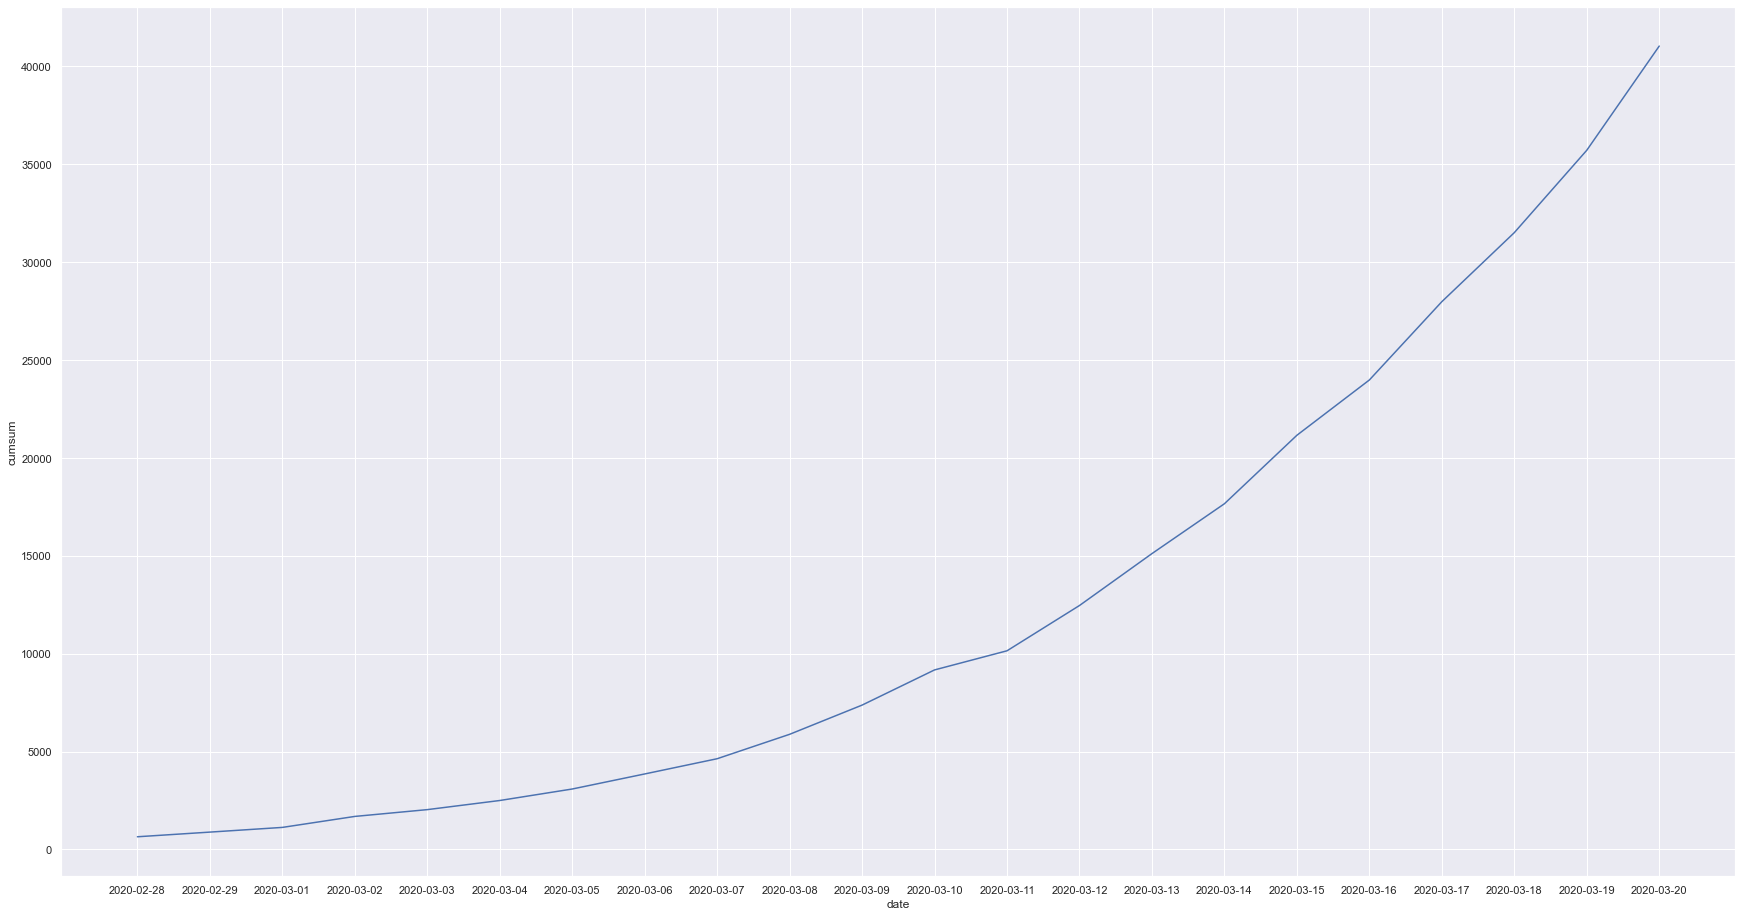

In [183]:
sb.lineplot(data=italy[(italy.date >= "2020-02-28") & (italy.date <= "2020-03-20")], x = 'date', y='cumsum')
sb.set(rc = {'figure.figsize':(60,16)})

In [154]:
italy[italy.date == "2020-03-20"]["cumsum"] - italy[italy.date == "2020-03-20"].new_cases

10768    35713
dtype: int64

In [155]:
covid_df.groupby('location').new_deaths.sum().sort_values(ascending=False)

location
World                              411195
United States                      112006
United Kingdom                      40883
Brazil                              38406
Italy                               34043
                                    ...  
Bonaire Sint Eustatius and Saba         0
Seychelles                              0
Bhutan                                  0
Saint Kitts and Nevis                   0
Dominica                                0
Name: new_deaths, Length: 212, dtype: int64

In [156]:
l_beds = covid_df[covid_df.hospital_beds_per_thousand >= 5]
h_gdp = l_beds[l_beds.gdp_per_capita > 10000]

In [157]:
print('l_beds: ', l_beds, '\n', 'h_gdp: ', h_gdp )

l_beds:          location        date  new_cases  new_deaths  population  \
734    Argentina  2020-03-04          1           0  45195777.0   
735    Argentina  2020-03-06          1           0  45195777.0   
736    Argentina  2020-03-07          6           0  45195777.0   
737    Argentina  2020-03-08          1           1  45195777.0   
738    Argentina  2020-03-09          3           0  45195777.0   
...          ...         ...        ...         ...         ...   
21501    Ukraine  2020-06-06        550          15  43733759.0   
21502    Ukraine  2020-06-07          0           0  43733759.0   
21503    Ukraine  2020-06-08        485          11  43733759.0   
21504    Ukraine  2020-06-09        463           9  43733759.0   
21505    Ukraine  2020-06-10        394          13  43733759.0   

       aged_65_older_percent  gdp_per_capita  hospital_beds_per_thousand  
734                   11.198       18933.907                         5.0  
735                   11.198       1

In [158]:
len(h_gdp)/len(l_beds)

0.8350463775382301

In [159]:
covid_df.location.value_counts()

Germany           163
Japan             163
Czech Republic    163
United States     163
Brazil            163
                 ... 
Yemen              62
Western Sahara     46
Tajikistan         41
Comoros            40
Lesotho            27
Name: location, Length: 212, dtype: int64

In [160]:
covid_df.new_deaths.value_counts()

0       16008
1        1655
2         835
3         511
4         386
        ...  
199         1
262         1
274         1
269         1
4929        1
Name: new_deaths, Length: 634, dtype: int64

In [161]:
covid_df.date = pd.to_datetime(covid_df.date)

In [162]:
covid_df.location.nunique()

212

In [163]:
covid_df.dtypes

location                              object
date                          datetime64[ns]
new_cases                              int64
new_deaths                             int64
population                           float64
aged_65_older_percent                float64
gdp_per_capita                       float64
hospital_beds_per_thousand           float64
dtype: object

In [164]:
covid_df['location'] = covid_df['location'].astype('str')

In [165]:
# covid_df.location['Nigeria'].value_counts()

In [166]:
covid_df.dtypes

location                              object
date                          datetime64[ns]
new_cases                              int64
new_deaths                             int64
population                           float64
aged_65_older_percent                float64
gdp_per_capita                       float64
hospital_beds_per_thousand           float64
dtype: object

In [167]:
covid_df[['new_cases', 'new_deaths']].describe()

,new_cases,new_deaths
count,23082.000000,23082.000000
mean,624.769257,35.629062
std,5517.309068,330.986941
min,-2461.000000,-1918.000000
25%,0.000000,0.000000
50%,3.000000,0.000000
75%,55.000000,1.000000
max,133510.000000,10520.000000


In [168]:
covid_df[['population', 'aged_65_older_percent']].describe()

,population,aged_65_older_percent
count,2.308200e+04,23082.000000
mean,1.250256e+08,9.664970
std,7.832517e+08,6.441437
min,8.090000e+02,1.144000
25%,2.083380e+06,3.853000
50%,9.449321e+06,7.304000
75%,3.481387e+07,14.952000
max,7.794799e+09,27.049000


In [169]:
variance = np.var(covid_df)
print(variance)

new_cases                     3.043938e+07
new_deaths                    1.095476e+05
population                    6.134566e+17
aged_65_older_percent         4.149031e+01
gdp_per_capita                4.427778e+08
hospital_beds_per_thousand    6.795104e+00
dtype: float64
